<a href="https://colab.research.google.com/github/rutik1093/Acme-Employee-Attrition-Analysis-and-Prediction/blob/main/Financial_Risk_Analysis_and_Prediction_of_online_P2P_Lending_Platform(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Data Exploration**

In [71]:
df1= pd.read_csv('/content/prosperLoanData.csv')

In [72]:
df1.shape

(113937, 81)

In [73]:
df1.head(5)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,09:29.3,C,36,Completed,8/14/2009 0:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,41:46.8,640.0,659.0,10/11/2001 0:00,5.0,4.0,12.0,1,24,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,9/12/2007 0:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,28:07.9,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2/27/2014 8:28,680.0,699.0,3/18/1996 0:00,14.0,14.0,29.0,13,389,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,3/3/2014 0:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,00:47.1,HR,36,Completed,12/17/2009 0:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,09:10.1,480.0,499.0,7/27/2002 0:00,NaN,NaN,3.0,0,0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,1/17/2007 0:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,02:35.0,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,10/22/2012 11:02,800.0,819.0,2/28/1983 0:00,5.0,5.0,29.0,7,115,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,11/1/2012 0:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,38:39.1,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN,Executive,Employed,44.0,True,False,NaN,9/14/2013 18:38,680.0,699.0,2/20/2004 0:00,19.0,19.0,49.0,6,220,1.0,9.0,0.0,0.0,0.0,0.0,0.0,6193.0,0.81,695.0,39.0,0.95,2.0,0.26,"$100,000+",True,9583.333333,A18036930218888920068

In [74]:
df1.tail(4)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
113933,E6DB353036033497292EE43,537216,42:55.3,NaN,36,FinalPaymentInProgress,NaN,0.13220,0.1110,0.1010,0.10070,0.0200,0.08070,6.0,A,8.0,7,PA,Professional,Employed,21.0,True,False,NaN,11/3/2011 20:42,700.0,719.0,1/17/1992 0:00,14.0,13.0,39.0,9,495,1.0,4.0,1.0,5062.0,4.0,0.0,0.0,15743.0,0.69,6658.0,39.0,0.92,0.0,0.11,"$75,000-99,999",True,8041.666667,62D93634569816897D5A276,3.0,60.0,60.0,0.0,0.0,33501.0,4815.42,-26.0,0,NaN,28,55801,2000,11/7/2011 0:00,Q4 2011,55C4336679182766893E4FC,65.57,2330.5500,1997.16,333.3900,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
113934,E6E13596170052029692BB1,1069178,49:12.7,NaN,60,Current,NaN,0.23984,0.2150,0.2050,0.18828,0.1025,0.08578,3.0,D,3.0,1,TX,Other,Employed,84.0,True,False,NaN,12/13/2013 5:49,700.0,719.0,2/25/2002 0:00,12.0,12.0,25.0,9,521,1.0,2.0,0.0,0.0,0.0,0.0,0.0,22147.0,0.73,7853.0,25.0,1.00,0.0,0.51,"$25,000-49,999",True,2875.000000,DD1A370200396006300ACA0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,3,123122,10000,12/23/2013 0:00,Q4 2013,0FE0370029359765342FDB5,273.35,546.7000,183.15,363.5500,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,E6EB3531504622671970D9E,539056,18:26.6,NaN,60,Completed,8/13/2013 0:00,0.28408,0.2605,0.2505,0.24450,0.0850,0.15950,4.0,C,5.0,2,GA,Food Service,Full-time,94.0,True,False,NaN,11/14/2011 13:18,680.0,699.0,12/1/1993 0:00,11.0,11.0,22.0,7,488,1.0,4.0,0.0,0.0,0.0,1.0,0.0,11956.0,0.69,4137.0,19.0,0.80,1.0,0.48,"$25,000-49,999",True,3875.000000,589536350469116027ED11B,1.0,16.0,16.0,0.0,0.0,5000.0,3264.37,-4.0,0,NaN,28,56401,15000,11/21/2011 0:00,Q4 2011,A33834861822272782621C8,449.55,21122.5600,15000.00,6122.5600,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274
113936,E6ED3600409833199F711B7,1140093,27:37.7,NaN,36,Current,NaN,0.13189,0.1039,0.0939,0.09071,0.0299,0.06081,6.0,A,7.0,1,NY,Professor,Employed,244.0,False,False,NaN,1/15/2014 9:27,680.0,699.0,1/1/1995 0:00,10.0,9.0,44.0,8,289,0.0,1.0,1.0,257.0,3.0,1.0,0.0,6166.0,0.80,675.0,36.0,0.75,0.0,0.23,"$50,000-74,999",True,4583.333333,00AF3704550953269A64E40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,2,127508,2000,1/21/2014 0:00,Q1 2014,CE1E3704648000761C9F724,64.90,64.3307,47.25,17.0807,-1.70,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [75]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [76]:
df1.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

In [77]:
df1.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,113937.000000,106312.000000,113346.000000,113346.000000,106333.000000,106333.000000,113240.000000,113937.00000,113937.000000,113240.000000,112778.000000,113240.000000,106315.000000,112947.000000,113240.000000,106333.000000,1.063330e+05,106333.000000,106393.000000,106393.000000,106393.000000,106393.000000,105383.000000,1.139370e+05,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,18928.000000,113937.000000,16952.000000,113937.000000,113937.000000,113937.00000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,2.774209,96.071582,685.567731,704.567731,10.317192,9.260164,26.754539,6.96979,398.292161,1.435085,5.584405,0.592052,984.507059,4.154984,0.312646,0.015094,1.759871e+04,0.561309,11210.225447,23.230034,0.885897,0.802327,0.275947,5.608026e+03,1.421100,22.934345,22.271949,0.613629,0.048540,8472.311961,2930.313906,-3.223214,152.816539,16.268464,31.896882,69444.474271,8337.01385,272.475783,4183.079489,3105.536588,1077.542901,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,3.996797,94.480605,66.458275,66.458275,5.457866,5.022644,13.637871,4.63097,447.159711,2.437507,6.429946,1.978707,7158.270157,10.160216,0.727868,0.154092,3.293640e+04,0.317918,19818.361309,11.871311,0.148179,1.097637,0.551759,7.478497e+03,0.764042,19.249584,18.830425,2.446827,0.556285,7395.507650,3806.635075,50.063567,466.320254,9.005898,29.974184,38930.479610,6245.80058,192.697812,4790.907234,4069.527670,1183.414168,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-209.000000,0.000000,0.000000,0.000000,1.000000,1000.00000,0.000000,-2.349900,0.000000,-2.349900,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000

In [78]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

**Data Cleaning**

In [79]:
df1.isnull().sum()

ListingKey                                  0
ListingNumber                               0
ListingCreationDate                         0
CreditGrade                             84984
Term                                        0
LoanStatus                                  0
ClosedDate                              58848
BorrowerAPR                                25
BorrowerRate                                0
LenderYield                                 0
EstimatedEffectiveYield                 29084
EstimatedLoss                           29084
EstimatedReturn                         29084
ProsperRating (numeric)                 29084
ProsperRating (Alpha)                   29084
ProsperScore                            29084
ListingCategory (numeric)                   0
BorrowerState                            5515
Occupation                               3588
EmploymentStatus                         2255
EmploymentStatusDuration                 7625
IsBorrowerHomeowner               

In [80]:
# To Check Null Values with Percentage
null_counts = df1.isnull().sum()
total_rows = len(df1)
for column, null_count in null_counts.items():
    if null_count > 0:
        null_percentage = (null_count / total_rows) * 100
        print(f"Column '{column}' has {null_count} null values, which is {null_percentage:.2f}% of total rows.")



Column 'CreditGrade' has 84984 null values, which is 74.59% of total rows.
Column 'ClosedDate' has 58848 null values, which is 51.65% of total rows.
Column 'BorrowerAPR' has 25 null values, which is 0.02% of total rows.
Column 'EstimatedEffectiveYield' has 29084 null values, which is 25.53% of total rows.
Column 'EstimatedLoss' has 29084 null values, which is 25.53% of total rows.
Column 'EstimatedReturn' has 29084 null values, which is 25.53% of total rows.
Column 'ProsperRating (numeric)' has 29084 null values, which is 25.53% of total rows.
Column 'ProsperRating (Alpha)' has 29084 null values, which is 25.53% of total rows.
Column 'ProsperScore' has 29084 null values, which is 25.53% of total rows.
Column 'BorrowerState' has 5515 null values, which is 4.84% of total rows.
Column 'Occupation' has 3588 null values, which is 3.15% of total rows.
Column 'EmploymentStatus' has 2255 null values, which is 1.98% of total rows.
Column 'EmploymentStatusDuration' has 7625 null values, which is

In [81]:
df1.drop(columns=['CreditGrade', 'TotalProsperLoans', 'TotalProsperPaymentsBilled','OnTimeProsperPayments','ProsperPaymentsLessThanOneMonthLate','LoanFirstDefaultedCycleNumber','ScorexChangeAtTimeOfListing','ProsperPaymentsOneMonthPlusLate','ProsperPaymentsLessThanOneMonthLate','OnTimeProsperPayments','TotalProsperPaymentsBilled','TotalProsperLoans','GroupKey','ProsperPrincipalBorrowed','ProsperPrincipalOutstanding'],inplace= True)

In [82]:
df1.dropna(subset=['EstimatedEffectiveYield','EstimatedLoss','EstimatedReturn','ProsperRating (Alpha)','ProsperScore'], inplace=True)

In [83]:
df1.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'Term',
       'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'DateCreditPulled',
       'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'AvailableBankcardCredit', 'TotalT

In [84]:
# fissing Values Immputaion

df1['EmploymentStatus'].fillna(df1['EmploymentStatus'].mode()[0], inplace=True)

df1['Occupation'].fillna(df1['Occupation'].mode()[0], inplace=True)

df1['CreditScoreRangeLower'].fillna(df1['CreditScoreRangeLower'].mean(), inplace=True)

df1['CreditScoreRangeUpper'].fillna(df1['CreditScoreRangeUpper'].mean(), inplace=True)

df1['DebtToIncomeRatio'].fillna(df1['DebtToIncomeRatio'].mean(), inplace=True)

df1['EmploymentStatusDuration'].fillna(df1['EmploymentStatusDuration'].mean(), inplace=True)




In [85]:
missing_values_count = df1.isnull().sum()
print("Number of missing values in dataset':", missing_values_count)


Number of missing values in dataset': ListingKey                                0
ListingNumber                             0
ListingCreationDate                       0
Term                                      0
LoanStatus                                0
ClosedDate                            58848
BorrowerAPR                               0
BorrowerRate                              0
LenderYield                               0
EstimatedEffectiveYield                   0
EstimatedLoss                             0
EstimatedReturn                           0
ProsperRating (numeric)                   0
ProsperRating (Alpha)                     0
ProsperScore                              0
ListingCategory (numeric)                 0
BorrowerState                             0
Occupation                                0
EmploymentStatus                          0
EmploymentStatusDuration                  0
IsBorrowerHomeowner                       0
CurrentlyInGroup                      

<Axes: >

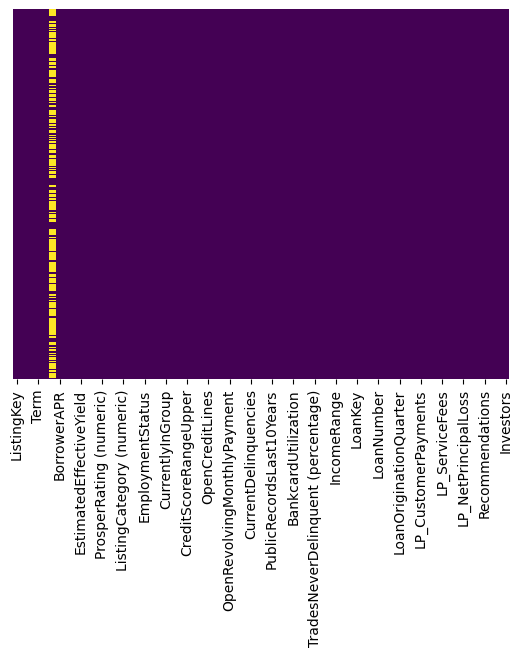

In [86]:

sns.heatmap(df1.isnull(),yticklabels=False,cbar=False,cmap='viridis')


In [87]:
# Check for duplicate rows
print("\nChecking for duplicate rows:")
duplicate_rows = df1[df1.duplicated()]
if duplicate_rows.empty:
    print("No duplicate rows found.")
else:
    print("Duplicate rows found. Removing duplicates...")
    df.drop_duplicates(inplace=True)



Checking for duplicate rows:
No duplicate rows found.


** Check and handle Outliers in a dataset**

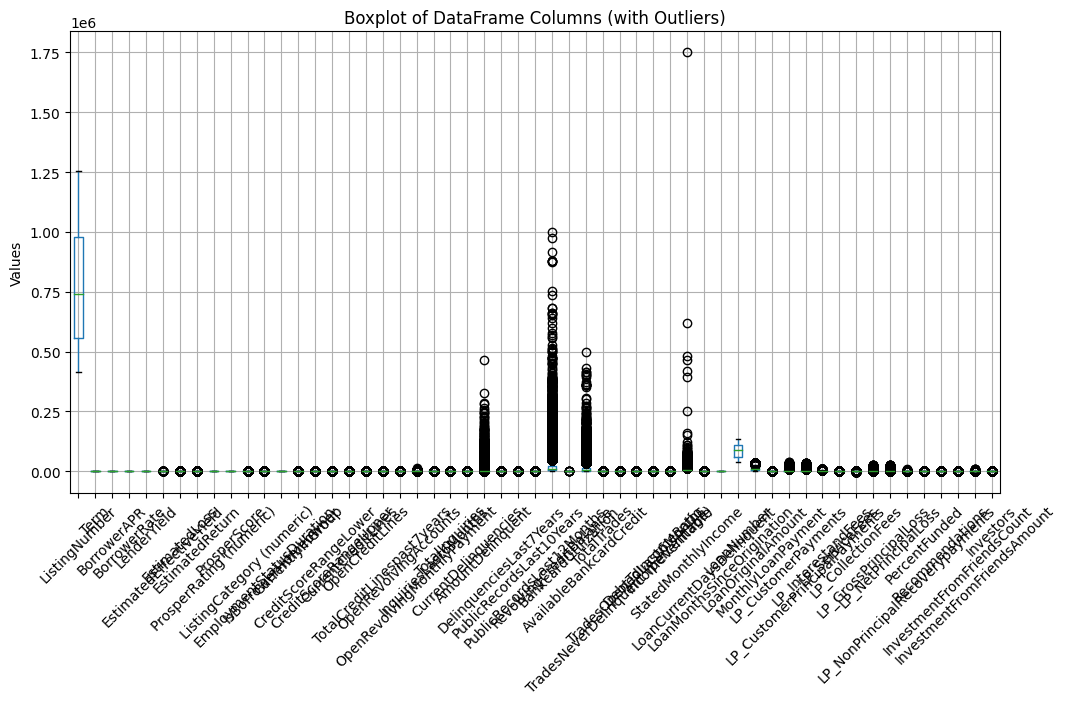

In [88]:
# Visualize outliers using box plots
plt.figure(figsize=(12, 6))
df1.boxplot()
plt.title('Boxplot of DataFrame Columns (with Outliers)')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

In [89]:
# Define a function to handle outliers using Z-Score for numeric columns
def handle_outliers_zscore(df1):
    df_no_outliers = df1.copy()
    for column in df1.select_dtypes(include=[np.number]).columns:
        z_scores = np.abs((df1[column] - df1[column].mean()) / df1[column].std())
        threshold = 3
        df_no_outliers[column] = df1[column][(z_scores < threshold)]
    return df_no_outliers

# Handle outliers for numeric columns using Z-Score
df_no_outliers = handle_outliers_zscore(df1)

# Display the result
print("Original DataFrame shape:", df1.shape)
print("DataFrame shape after removing outliers using Z-Score:", df_no_outliers.shape)

Original DataFrame shape: (84853, 70)
DataFrame shape after removing outliers using Z-Score: (84853, 70)


**Data Encoding**

In [90]:
!pip install category-encoders # (we used category encoders as a One Hot Encoding to tranform the data of Data set which has all categorical data . one Hot Encoding(category-encoders) help to convert )

In [91]:
import category_encoders as ce

In [92]:
# encode variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['Occupation', 'EmploymentStatus', 'IsBorrowerHomeowner', 'CurrentlyInGroup', 'IncomeVerifiable', 'ProsperRating (Alpha)','BorrowerState','']) # OrdinalEncoder() replaces the categories by digits, starting from 0 to k-1, where k is the number of different categories.


**In the LoanStatus there are a lot of categories. So, with the help of "ClosedDate" and "LoancurrentDaysDelinquent" I can make LoanStatus into binary.**


In [93]:
# first deal it with the ClosedDate
df1["Status"] = df1["ClosedDate"].apply(lambda x: 1 if pd.isnull(x) else 0)

In [94]:
#2. second deal it with the LoanCurrnetDaysDeliquent
df1["Status"] = df1["LoanCurrentDaysDelinquent"].apply(lambda x: 1 if x > 180 else 0)